In [1]:
from inference_demo_helper import *
from config import DummyArgs
from PIL import Image

#`!pip install -r requirements.txt`

Provide the value of architecture you want to use (0-7):  1
Provide the value of architecture you want to use (0-7):  1
Provide the value of architecture you want to use (0-7):  1


## Note:
There are dependencies issues so you need to pass in the architecture from `0-7` from the input prompt. Use the same value below too.

In [2]:
args = DummyArgs(arch = 1) # Follow procedure and it'll work awesome for all the 8 i.e 0-7 models
inf_class = Inference(args)

Loaded pretrained weights for efficientnet-b1
###### pre-trained Model restored #####


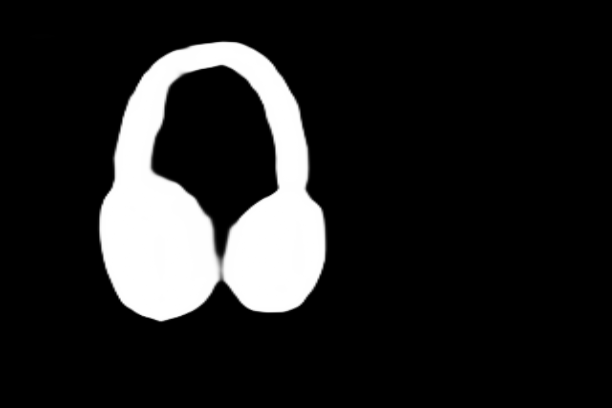

In [10]:
image = "https://media.istockphoto.com/photos/stylish-blue-headphones-on-multi-colored-duo-tone-background-lighting-picture-id1175355990?k=20&m=1175355990&s=612x612&w=0&h=LX5kcpZKWyJQA_Kh5Ub9EwDNpGtAimGr2AePNQJPYxE="
mask = inf_class.test(image) # You can pass any of the following: numpy array of RGB image, image URL, image, path or Pillow Image 
mask_image = Image.fromarray(mask)

mask_image